This is about analysing the windspeed data using the regression.

In [22]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
#reading in the database and skipping first 19 rows
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/mly4935.csv", skiprows=19)
print(df.head(3))

   year  month  meant maxtp mintp  mnmax  mnmin   rain gmin wdsp maxgt sun
0  1996      8   13.4  20.4   7.3   16.6   10.3  109.4  5.3  8.3    34    
1  1996     10    9.7               12.5    7.0                           
2  1996     11    5.0                7.6    2.5                           


In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    338 non-null    int64  
 1   month   338 non-null    int64  
 2   meant   338 non-null    float64
 3   maxtp   338 non-null    object 
 4   mintp   338 non-null    object 
 5   mnmax   338 non-null    float64
 6   mnmin   338 non-null    float64
 7   rain    338 non-null    object 
 8   gmin    338 non-null    object 
 9   wdsp    338 non-null    object 
 10  maxgt   338 non-null    object 
 11  sun     338 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 31.8+ KB
None


In [25]:
#making a new database with the month & windspeed column
cleandf = df[["month", "wdsp"]]
print(cleandf)

     month wdsp
0        8  8.3
1       10     
2       11     
3       12  9.4
4        1  8.0
..     ...  ...
333      6  9.0
334      7  7.7
335      8  9.5
336      9  8.3
337     10  8.5

[338 rows x 2 columns]


In [26]:
#checking if there are any whitespaces, looks like there are
cleandf['wdsp'].str.isspace().sum()

2

In [27]:
cleandf_new = cleandf[cleandf['wdsp'] != ' '] #removing all whitespaces
cleandf_new['wdsp'].str.isspace().sum() #checking if all are removed

0

In [28]:
cleandf_new['wdsp'].eq(0).sum() #checking if there are any records with the zero value

0

In [29]:
print(cleandf_new.info()) #Windspeed column is an object, which needs to be converted to the float

<class 'pandas.core.frame.DataFrame'>
Index: 336 entries, 0 to 337
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   month   336 non-null    int64 
 1   wdsp    336 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.9+ KB
None


In [30]:
cleandf_new['wdsp'] = cleandf_new['wdsp'].astype(float) #converting to float type
print(cleandf_new.info())

<class 'pandas.core.frame.DataFrame'>
Index: 336 entries, 0 to 337
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   336 non-null    int64  
 1   wdsp    336 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.9 KB
None


C:\Users\siklo\AppData\Local\Temp\ipykernel_23188\34091110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandf_new['wdsp'] = cleandf_new['wdsp'].astype(float) #converting to float type


In [31]:
#now checking the correlation
corrwind = cleandf_new['month'].corr(cleandf_new['wdsp'])
print(f"Wind Correlation is {corrwind}")

Wind Correlation is -0.19999237419389979


c:\Users\siklo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


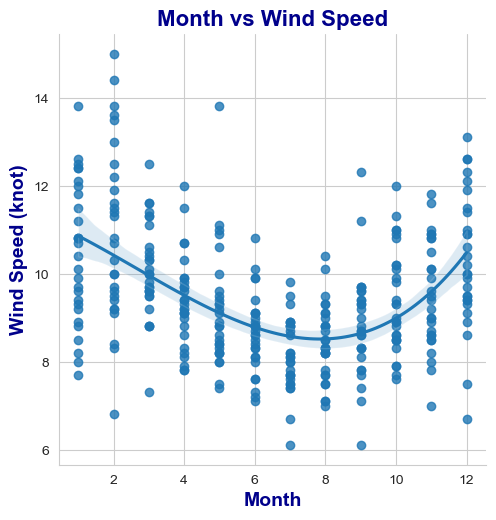

In [32]:
#plotting using scatterplot

sns.set_style('whitegrid')
color = sns.color_palette("Paired")
sns.lmplot(x='month', y='wdsp', order=3, data=cleandf_new, palette=color)

plt.title('Month vs Wind Speed', color ='darkblue', fontsize = 16, fontweight='bold')
plt.xlabel('Month', color ='darkblue', fontsize = 14, fontweight='bold')
plt.ylabel('Wind Speed (knot)',color ='darkblue', fontsize = 14, fontweight='bold')
plt.show()

### End